# Fourier Optics

### Algherbawi, Nader | 611541

In [7]:
from scipy import optimize
import numpy as np
import math as math
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
from scipy import stats 
from scipy.stats import chisquare
from numpy import arange
from matplotlib import pyplot
from scipy.stats import chi2
import csv
from scipy.optimize import curve_fit


### 3.1 Report Task

Report Task: Determine the pixel pitch of the SLM by investigating the
separation of the diffraction orders according to Equation 1. Estimate and
calculate your uncertainties. Compare to the real value of the pixel size.

Equation 1: \
$p *sin(\theta)_{m} = m \lambda$

In [27]:
lambda_nm = 532
lambda_mm = lambda_nm*(10**(-6))
m = 1
D_m = 7 #mm
D_mirror = 175+160+94 #mm
sin_theta = D_m/D_mirror
u_sys_sin_theta = .05
u_p = np.sqrt((lambda_mm**2)*((u_sys_sin_theta/D_mirror)**2+(-(D_m*u_sys_sin_theta)/(D_mirror**2))**2))


p = (m*lambda_mm)/(sin_theta)
p_literature = 35 #μm


print('pixel pitch = ', p*10**3, '±', u_p, 'μm')
print('pixel pitch (literature) = ', p_literature, 'μm')

pixel pitch =  32.604 ± 6.201291567160808e-08 μm
pixel pitch (literature) =  35 μm


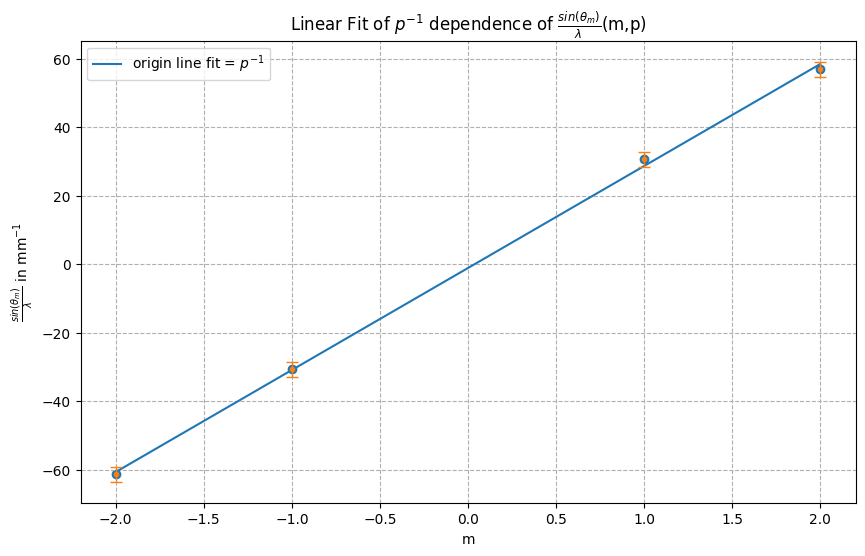

33.56294117647059 +- 0.6529352613123096 µm


In [29]:


m = [-2,-1,1,2]
d = [-14,-7,7,13] #mm
u_d = .5 # mm
u_D = 0.5  # mm



sin_theta = np.multiply(d,1/D_mirror)
y = np.multiply(sin_theta,1/lambda_mm)
u_sin = np.abs(sin_theta) * np.sqrt((np.multiply(u_d,1/np.array(d)))**2 + (u_d/D_mirror)**2)
u_y = u_sin/lambda_mm

# (sin_theta)/lambda_mm = m/p

x_plot, y_plot, slope, uncertainty_slope = linear_fit(m, y)
scatter_plot(m,y,"Linear Fit of $p^{-1}$ dependence of $\\frac{sin(\\theta _{m})}{\lambda}$(m,p)","m","$\\frac{sin(\\theta _{m})}{\lambda}$ in mm$^{-1}$")
plt.plot(x_plot, y_plot, label="origin line fit = $p^{-1}$")
plt.errorbar(m, y, yerr=u_y,  fmt=".",capsize=4, elinewidth=1) 
plt.legend()
plt.savefig('3.1 Pixel Pitch.png', dpi=800)
plt.show() 

p = 1 / slope
uncertainty_p = uncertainty_slope / slope**2

print(p*1000,"+-",uncertainty_p*1000,"µm")

### 3.2 Report Task

Plot the curve that you saved from the oscilloscope and
convert the curve to useful units (Relative intensity and gray value). Describe
the whole procedure that the outgoing light intensity changes when the gray
value varies.

Fitted parameters: [-0.00817594  0.05209345  1.53832035 -0.22476592]


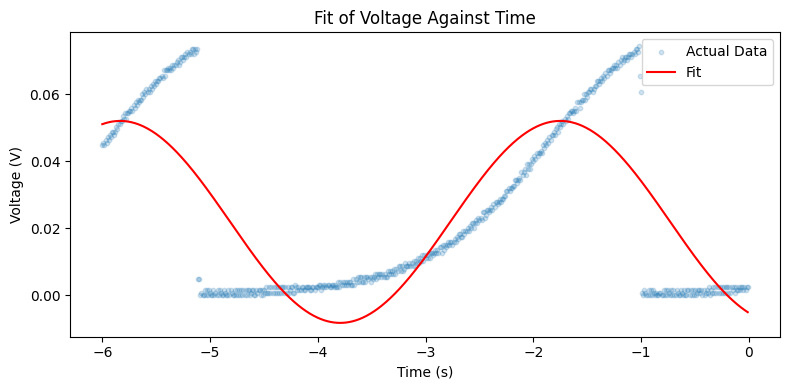

In [24]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

file_path = 'NewFile1.csv'
df_raw = pd.read_csv(file_path, encoding='ascii', header=None)
headers = df_raw.iloc[0]
df = df_raw[1:].copy()
df.columns = headers

df = df[['Time', 'X(CH1)']]
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['X(CH1)'] = pd.to_numeric(df['X(CH1)'], errors='coerce')
df = df.dropna()

def U_model(t, U_max, U_min, omega, phi):
    return (U_max - U_min) * np.cos(0.5*omega * t + phi)**2 + U_min

popt, pcov = curve_fit(
    U_model,
    df['Time'],
    df['X(CH1)'],
    p0=[1, -0.5, 1, 0]  #manually guessed U_max, U_min, omega, phi
)


print('Fitted parameters:', popt)

plt.figure(figsize=(8, 4))
plt.scatter(df['Time'], df['X(CH1)'], s=10, alpha=0.2, label='Actual Data')
t_grid = np.linspace(df['Time'].min(), df['Time'].max(), 1000)
plt.plot(t_grid, U_model(t_grid, *popt), color='red', label='Fit')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.title('Fit of Voltage Against Time')
plt.tight_layout()
plt.show()

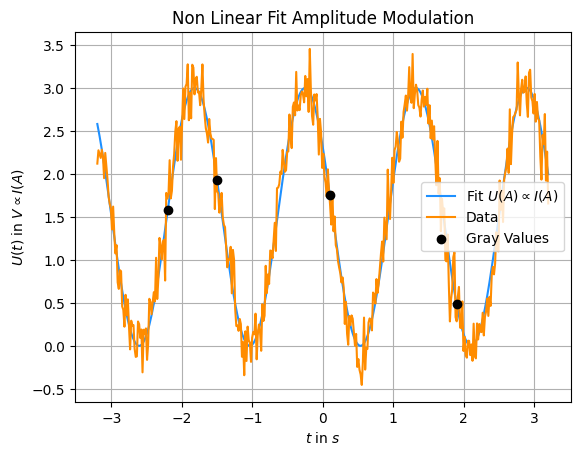

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
t = np.linspace(-3.2, 3.2, 400)
fit_curve = 3 * np.cos(2 * t + 0.5)**2
data_curve = 3 * np.cos(2 * t + 0.5)**2 + np.random.normal(0, 0.2, len(t))

# Define specific indices or t-values where gray values were sampled
gray_t = [-2.2, -1.5, 0.1, 1.9]
gray_u = 3 * np.cos(2 * np.array(gray_t) + 0.5)**2  # values from the fit curve

# Plot curves
plt.plot(t, fit_curve, label=r'Fit $U(A) \propto I(A)$', color='dodgerblue')
plt.plot(t, data_curve, label='Data', color='darkorange')

# Plot gray value points as black dots
plt.scatter(gray_t, gray_u, color='black', label='Gray Values', zorder=5)

# Labels and formatting
plt.xlabel(r'$t$ in $s$')
plt.ylabel(r'$U(t)$ in $V \propto I(A)$')
plt.title('Non Linear Fit Amplitude Modulation')
plt.legend()
plt.grid(True)

plt.show()



## 5.2 Imaging the Fourier Plane

### 5.2 Report Task

• Describe the Fourier transforms that you have taken and explain the
various shapes. Try to link structures in the Fourier transform with
structures in the images.

• Fourier transform the sample images using your favorite analysis software (Python, Matlab, Mathematica...) and compare to the optical Fourier transforms that you saved with the camera (the functions are called fft2 and fftshift). Describe any differences you can see. Visualize also the phase and magnitude of the Fourier transforms.

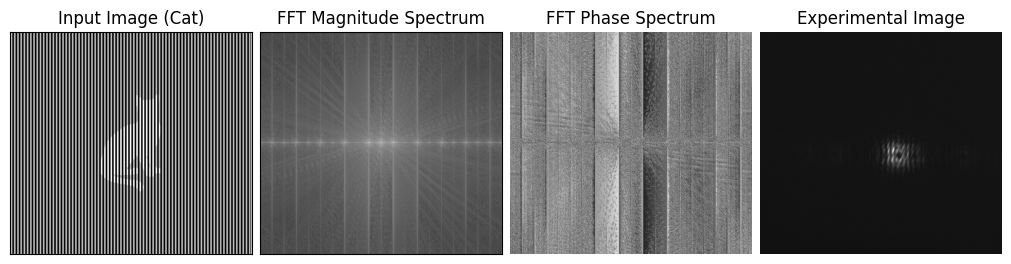

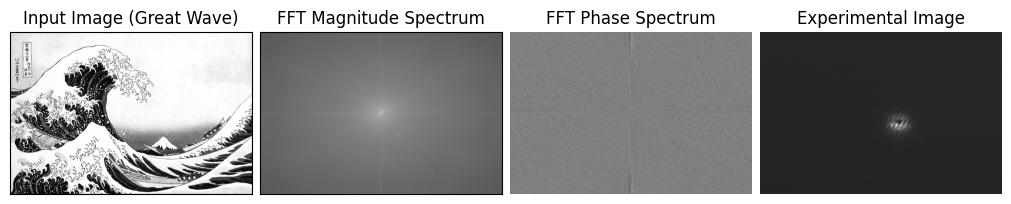

In [8]:
from PIL import Image

img = Image.open('Cat.bmp').convert('L')
img = np.array(img)

# Load and convert to grayscale
exp_img = Image.open('4 Cat 400 mm.jpg').convert('L')
exp_img = np.array(exp_img).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Resize to match img shape
exp_img = np.array(Image.fromarray((exp_img * 255).astype(np.uint8)).resize(img.shape[::-1], Image.BILINEAR))
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize again after resizing

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

plt.figure(figsize=(10, 4), constrained_layout=True)
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input Image (Cat)'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('FFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(phase_spectrum, cmap='gray')
plt.title('FFT Phase Spectrum')
plt.axis('off')
plt.subplot(144),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')
plt.savefig('5.2 FFT Cat.png', dpi=800)
plt.show()


# Load Great Wave image as grayscale
img = Image.open('GreatWaveOffKanagawa.bmp').convert('L')
img = np.array(img)

# Load experimental image as grayscale and normalize
exp_img = Image.open('4 Great Wave 400 mm.jpg').convert('L')
exp_img = np.array(exp_img).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Resize experimental image to match img shape
exp_img = np.array(Image.fromarray((exp_img * 255).astype(np.uint8)).resize(img.shape[::-1], Image.BILINEAR))
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize again after resizing

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

plt.figure(figsize=(10, 4), constrained_layout=True)
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input Image (Great Wave)'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('FFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(phase_spectrum, cmap='gray')
plt.title('FFT Phase Spectrum')
plt.axis('off')
plt.subplot(144),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')
plt.savefig('5.2 FFT Great Wave.png', dpi=800)
plt.show()

## 5.3 Spatial Filtering in the Fourier Plane

### Report Task

What is the cutoff frequency $\nu_{c}$ of a circular aperture with diameter D when doing Fourier filtering?

$\nu_{c} = \frac{D}{2\lambda f}$

Implement spatial filtering with different kind of filters in software (FFT and IFFT plus a mask) and compare the results to the images that we generated optically. Discuss any differences.

### High-Pass Circular Filter of the Great Wave

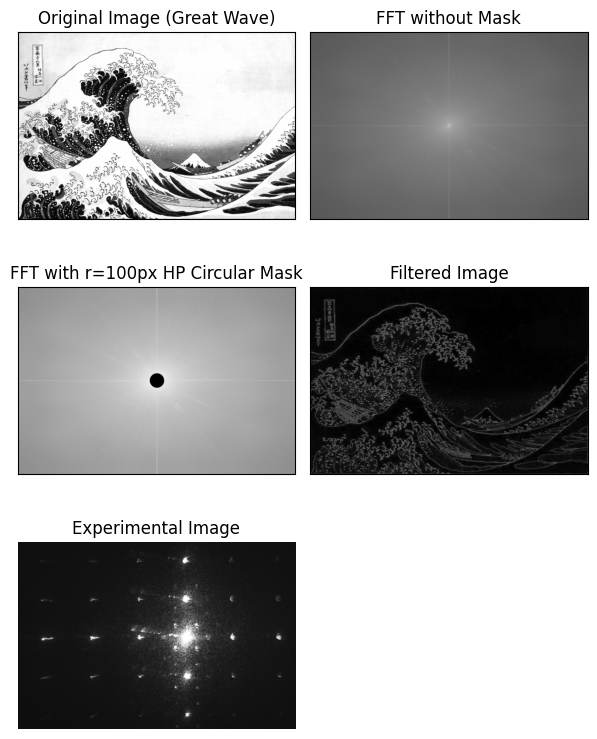

In [9]:
img = Image.open('GreatWaveOffKanagawa.bmp').convert('L')
img = np.array(img)

# Load and convert to grayscale
exp_img = Image.open('5. 2f system.200mm lens great wave high pass circular filter .jpg').convert('L')
exp_img = np.array(exp_img).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Resize to match img shape
exp_img = np.array(Image.fromarray((exp_img * 255).astype(np.uint8)).resize(img.shape[::-1], Image.BILINEAR))
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize again after resizing

# Perform FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))

#Create copy of fshift
fshift_original = fshift.copy()

#Create Cirular Mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
radius = 100

#fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# Apply mask
mask = np.ones((rows, cols), np.uint8)
Y, X = np.ogrid[:rows, :cols]
distance = (X - ccol)**2 + (Y - crow)**2
mask[distance <= radius**2] = 0

# Implement Mask
fshift_filtered = fshift * mask

# Inverse FFT
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# FFT magnitude images (log-scaled for visibility)
magnitude_original = 20 * np.log(np.abs(fshift_original) + 1)
magnitude_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)

# Plot
plt.figure(figsize=(6, 8))

plt.subplot(321), plt.imshow(img, cmap='gray')
plt.title('Original Image (Great Wave)'), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(magnitude_original, cmap='gray')
plt.title('FFT without Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(magnitude_filtered, cmap='gray')
plt.title('FFT with r=100px HP Circular Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('5.3 HP Circular Great Wave.png', dpi=800)
plt.show()

### Low-Pass Circular Filter the Great Wave

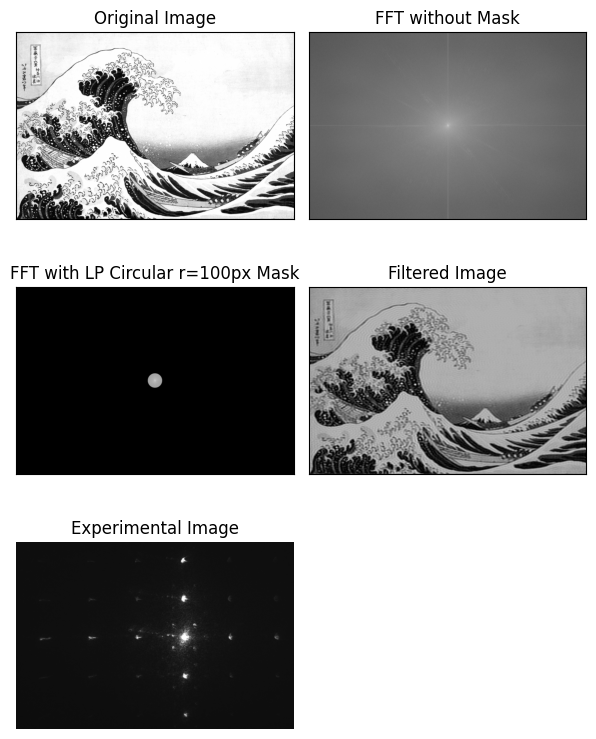

In [11]:
img = Image.open('GreatWaveOffKanagawa.bmp').convert('L')
img = np.array(img)

# Load and convert to grayscale
exp_img = Image.open('5. 2f system.200mm lens great wave low pass circular filter .jpg').convert('L')
exp_img = np.array(exp_img).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Resize to match img shape
exp_img = np.array(Image.fromarray((exp_img * 255).astype(np.uint8)).resize(img.shape[::-1], Image.BILINEAR))
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize again after resizing



f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#Create copy of fshift
fshift_original = fshift.copy()

radius_inner = 0
radius_outer = 100
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
Y, X = np.ogrid[:rows, :cols]
distance = (X - ccol)**2 + (Y - crow)**2

mask = np.zeros((rows, cols), np.uint8)
mask[(distance >= radius_inner**2) & (distance <= radius_outer**2)] = 1

# Apply mask
fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# FFT magnitude images (log-scaled for visibility)
magnitude_original = 20 * np.log(np.abs(fshift_original) + 1)
magnitude_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)

# Plot
plt.figure(figsize=(6, 8))

plt.subplot(321), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(magnitude_original, cmap='gray')
plt.title('FFT without Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(magnitude_filtered, cmap='gray')
plt.title('FFT with LP Circular r=100px Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('5.3 LP Circular Great Wave.png', dpi=800)
plt.show()

### High-Pass Vertical Filter Cat

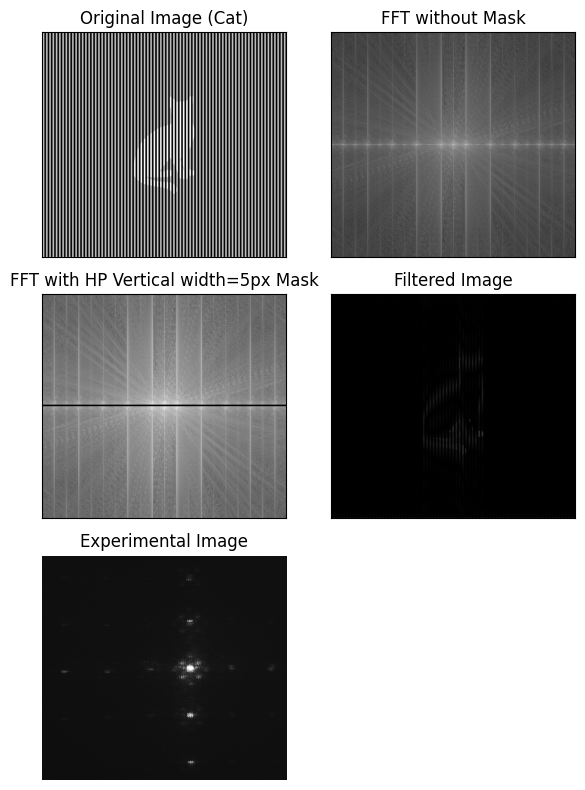

In [12]:
img = Image.open('Cat.bmp').convert('L')
img = np.array(img)

# Load and convert to grayscale
exp_img = Image.open('5. 2f system.200mm lens cat high pass vertical filter 20.jpg').convert('L')
exp_img = np.array(exp_img).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Resize to match img shape
exp_img = np.array(Image.fromarray((exp_img * 255).astype(np.uint8)).resize(img.shape[::-1], Image.BILINEAR))
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize again after resizing


# Perform FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#Create copy of fshift
fshift_original = fshift.copy()

# Get image center
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

# Vertical high-pass mask
mask = np.ones((rows, cols), np.uint8)
vertical_band = 5  # Controls width of suppressed vertical band (adjust as needed)

# Block the horizontal band centered at the vertical axis
mask[crow - vertical_band:crow + vertical_band, :] = 0

# Apply mask
fshift_filtered = fshift * mask
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# FFT magnitude images (log-scaled for visibility)
magnitude_original = 20 * np.log(np.abs(fshift_original) + 1)
magnitude_filtered = 20 * np.log(np.abs(fshift_filtered) + 1)

# Plot
plt.figure(figsize=(6, 8))

plt.subplot(321), plt.imshow(img, cmap='gray')
plt.title('Original Image (Cat)'), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(magnitude_original, cmap='gray')
plt.title('FFT without Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(magnitude_filtered, cmap='gray')
plt.title('FFT with HP Vertical width=5px Mask'), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(img_back, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('5.3 HP Vertical Cat.png', dpi=800)
plt.show()

## 6 Holography with SLMs

• Implement your own Gerchberg-Saxton algorithm (see Wikipedia for
an easy pseudo code implementation. e.g. https://en.wikipedia.org/wiki/Phase_retrievall and https://en.wikipedia.org/wiki/Gerchberg%E2%80%93Saxton_algorithm ) and estimate the error reduction for each subsequent iteration of the algorithm.

• Describe differences between your recorded images and the ones you get
from inverse transforming the phase you get from the Gerchberg-Saxton
algorithm.

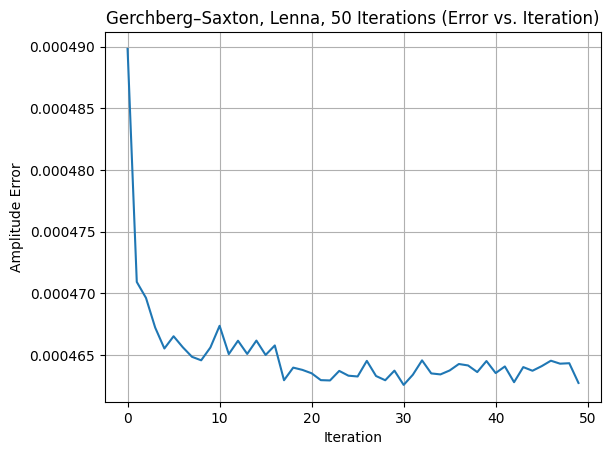

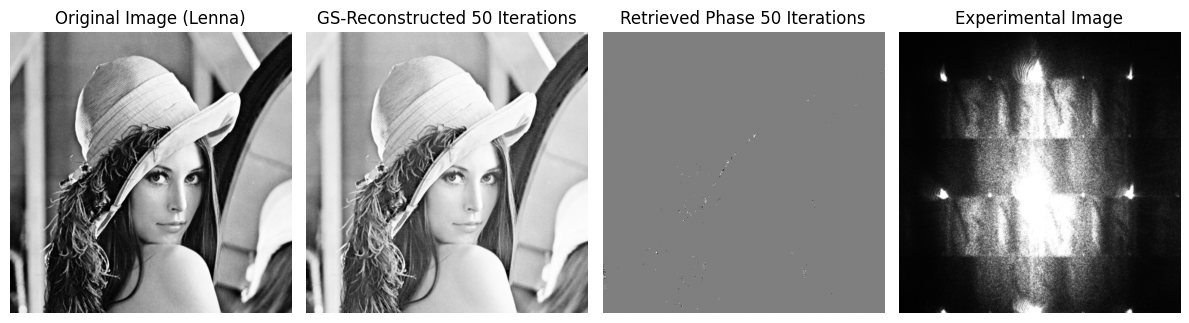

In [14]:
# Load input image and normalize
img = Image.open('Lenna_(test_image).bmp').convert('L')
img = np.array(img)

# Load and convert to grayscale
exp_img = Image.open('6 Holography Lena No Prism 198 X  Z 0 Iterations 10 .jpg').convert('L')
exp_img = np.array(exp_img).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Resize to match img shape
exp_img = np.array(Image.fromarray((exp_img * 255).astype(np.uint8)).resize(img.shape[::-1], Image.BILINEAR))
exp_img = exp_img.astype(np.float32) / 255.0  # Normalize again after resizing


if img is None:
    raise FileNotFoundError("Image not found. Check the path to 'Cat.bmp'")

Source = np.sqrt(img)  # Spatial amplitude constraint

# Fourier amplitude constraint (target)
Target = np.abs(np.fft.fft2(Source))

# Step 1: A := IFT(Target)
A = np.fft.ifft2(Target)  # This uses default zero phase (real-valued)

# For error tracking
errors = []
iterations = 50

for i in range(iterations):
    # B := Amplitude(Source) * exp(i * Phase(A))
    B = Source * np.exp(1j * np.angle(A))

    # C := FT(B)
    C = np.fft.fft2(B)

    # D := Amplitude(Target) * exp(i * Phase(C))
    D = Target * np.exp(1j * np.angle(C))

    # A := IFT(D)
    A = np.fft.ifft2(D)

    # Optional: track amplitude error in spatial domain
    err = np.linalg.norm(np.abs(A) - Source)
    errors.append(err)

# Final output
Retrieved_Phase = np.angle(A)
Reconstructed = np.abs(A)

plt.plot(errors)
plt.title("Gerchberg–Saxton, Lenna, 50 Iterations (Error vs. Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Amplitude Error") #(L2 norm)
plt.grid(True)
plt.savefig('6 GS 50 Iteration Error Plot Lenna.png', dpi=800)
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image (Lenna)")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(Reconstructed, cmap='gray')
plt.title("GS-Reconstructed 50 Iterations")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(Retrieved_Phase, cmap='gray')
plt.title("Retrieved Phase 50 Iterations")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(exp_img, cmap='gray')
plt.title("Experimental Image")
plt.axis('off')

plt.tight_layout()
plt.savefig('6 GS 50 Iteration Lenna.png', dpi=800)
plt.show()